In [1]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from nltk.corpus import stopwords 
# from collections import Counter
# import string
# import re
# import seaborn as sns
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.model_selection import train_test_split

출처 : https://github.com/ukairia777/finance_sentiment_corpus

In [2]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
finance_data = pd.read_csv("finance_data.csv")
finance_data
print('총 샘플의 수 :',len(finance_data))

총 샘플의 수 : 4846


In [4]:
finance_data

,labels,sentence,kor_sentence
0,neutral,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,neutral,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,negative,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,positive,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,positive,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
4842,neutral,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
4844,negative,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [5]:
# le = LabelEncoder()
# finance_data_labeled = finance_data.__deepcopy__() # deep copy 미사용시 finance data labeled 수정해도 finance data 같이 수정됨.
# finance_data_labeled["labels"] = le.fit_transform(finance_data_labeled["labels"])
# finance_data_labeled

In [6]:
finance_data_labeled = finance_data
finance_data_labeled['labels'] = finance_data_labeled['labels'].replace('neutral',0).replace('negative',-1).replace('positive',1)
finance_data

,labels,sentence,kor_sentence
0,0,"According to Gran, the company has no plans to...","Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로..."
1,0,Technopolis plans to develop in stages an area...,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...
2,-1,The international electronic industry company ...,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ..."
3,1,With the new production plant the company woul...,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...
4,1,According to the company's updated strategy fo...,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4..."
...,...,...,...
4841,-1,LONDON MarketWatch -- Share prices ended lower...,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...
4842,0,Rinkuskiai's beer sales fell by 6.5 per cent t...,린쿠스키아의 맥주 판매량은 416만 리터로 6.5% 감소했으며 카우노 알루스의 맥주...
4843,-1,Operating profit fell to EUR 35.4 mn from EUR ...,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이..."
4844,-1,Net sales of the Paper segment decreased to EU...,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...


In [7]:
del finance_data_labeled['kor_sentence']
finance_data_labeled.head()

,labels,sentence
0,0,"According to Gran, the company has no plans to..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company's updated strategy fo...


In [8]:
finance_data_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    4846 non-null   int64 
 1   sentence  4846 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


In [9]:
print('결측값 여부 :',finance_data_labeled.isnull().values.any())

결측값 여부 : False


In [10]:
print('sentence 열의 유니크한 값 :',finance_data_labeled['sentence'].nunique())

sentence 열의 유니크한 값 : 4838


In [11]:
duplicate = finance_data_labeled[finance_data_labeled.duplicated()] # unique data와 전체 data의 수가 맞지 않아 중복 제거

In [12]:
duplicate

,labels,sentence
1099,0,The issuer is solely responsible for the conte...
1416,0,The report profiles 614 companies including ma...
2396,0,Ahlstrom's share is quoted on the NASDAQ OMX H...
2567,0,SSH Communications Security Corporation is hea...
3094,0,Proha Plc ( Euronext :7327 ) announced today (...
3206,0,The company serves customers in various indust...


In [13]:
# 중복 제거
finance_data_labeled.drop_duplicates(subset=['sentence'], inplace=True)
print('총 샘플의 수 :',len(finance_data_labeled))

총 샘플의 수 : 4838


<Axes: xlabel='labels'>

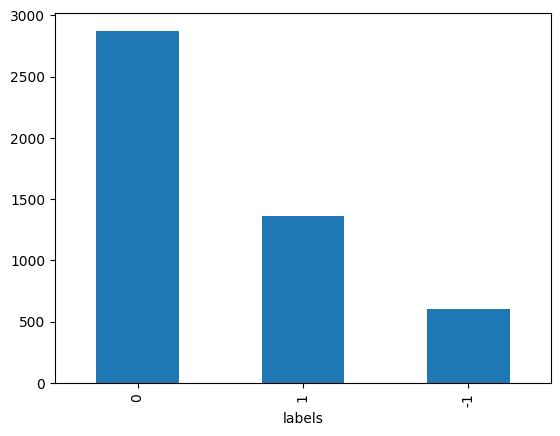

In [14]:
finance_data_labeled['labels'].value_counts().plot(kind='bar') # 0:negative, 1:neutral, 2:positive

In [15]:
print('레이블의 분포')
print(finance_data_labeled.groupby('labels').size().reset_index(name='count'))

레이블의 분포
   labels  count
0      -1    604
1       0   2872
2       1   1362


In [16]:
print(f'중립의 비율 = {round(finance_data_labeled["labels"].value_counts()[0]/len(finance_data_labeled) * 100,3)}%')
print(f'긍정의 비율 = {round(finance_data_labeled["labels"].value_counts()[1]/len(finance_data_labeled) * 100,3)}%')
print(f'부정의 비율 = {round(finance_data_labeled["labels"].value_counts()[-1]/len(finance_data_labeled) * 100,3)}%')

중립의 비율 = 59.363%
긍정의 비율 = 28.152%
부정의 비율 = 12.484%


In [17]:
X_data = finance_data_labeled['sentence']
y_data = finance_data_labeled['labels']
print('본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

본문의 개수: 4838
레이블의 개수: 4838


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [19]:
sorted(X_test.index)

[0,
 22,
 27,
 31,
 38,
 39,
 40,
 41,
 43,
 44,
 49,
 53,
 54,
 56,
 59,
 64,
 73,
 87,
 90,
 91,
 108,
 109,
 115,
 131,
 138,
 143,
 145,
 153,
 157,
 162,
 176,
 186,
 187,
 198,
 209,
 213,
 218,
 228,
 233,
 234,
 237,
 238,
 240,
 244,
 252,
 256,
 258,
 259,
 279,
 282,
 287,
 288,
 298,
 302,
 313,
 317,
 320,
 333,
 337,
 341,
 343,
 344,
 346,
 354,
 389,
 394,
 398,
 402,
 408,
 409,
 416,
 422,
 423,
 428,
 431,
 434,
 438,
 450,
 451,
 453,
 454,
 460,
 464,
 468,
 470,
 473,
 479,
 484,
 487,
 488,
 494,
 495,
 496,
 502,
 504,
 505,
 511,
 512,
 515,
 521,
 525,
 527,
 531,
 536,
 538,
 541,
 548,
 561,
 566,
 570,
 575,
 584,
 588,
 591,
 594,
 599,
 608,
 610,
 613,
 618,
 620,
 623,
 633,
 638,
 643,
 645,
 648,
 651,
 653,
 661,
 664,
 669,
 671,
 679,
 683,
 685,
 690,
 692,
 698,
 703,
 705,
 711,
 716,
 726,
 730,
 731,
 735,
 751,
 754,
 756,
 764,
 768,
 771,
 772,
 778,
 782,
 785,
 807,
 825,
 826,
 827,
 843,
 847,
 848,
 852,
 855,
 858,
 866,
 871,
 872,
 

In [20]:
len(X_test)

968

In [21]:
len(pd.unique(X_test.index))

968

In [22]:
print('훈련 샘플의 개수 :', len(X_train))
print('테스트 샘플의 개수 :', len(X_test))

훈련 샘플의 개수 : 3870
테스트 샘플의 개수 : 968


In [23]:
print('--------훈련 데이터의 비율-----------')
print(f'중립 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print(f'부정 = {round(y_train.value_counts()[-1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
중립 = 59.354%
긍정 = 28.165%
부정 = 12.481%


In [24]:
print('--------테스트 데이터의 비율-----------')
print(f'중립 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')
print(f'부정 = {round(y_test.value_counts()[-1]/len(y_test) * 100,3)}%')

--------테스트 데이터의 비율-----------
중립 = 59.401%
긍정 = 28.099%
부정 = 12.5%


In [25]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])
print(X_test_encoded[:5])

[[197, 2, 1, 1585, 10, 18, 3, 37], [754, 1792, 696, 15, 286, 1, 259, 2, 14, 1793, 1396, 45, 5, 21, 275, 1396, 525, 4441, 49, 1, 37, 93, 3069, 1397, 13, 19, 12, 560], [4442, 146, 2, 332, 10, 1269, 6, 421, 2, 43, 36, 71, 43, 38, 82, 61, 7, 68, 22, 1, 169, 323, 367, 12, 238, 279, 53], [3070, 136, 659, 33, 3071, 17, 1, 146, 2, 332, 34, 422, 2, 8, 24, 56, 27, 60, 9, 8, 43, 215, 27, 280, 95, 526, 183, 12, 130, 131, 51], [3, 266, 21, 755, 28, 402, 1060, 1586, 4, 89, 7, 4443, 4, 403, 10, 804, 4444, 1586, 28, 10, 18, 1143, 3, 6, 221, 1587, 2052, 1398, 217, 2053, 4, 1794, 3, 6, 24, 35, 4445, 204]]
[[726, 232, 55, 132, 173, 234, 178, 298, 68, 22, 178, 724, 1010, 726, 65, 735, 7, 16, 1250, 132, 807, 6, 81, 2, 2146, 57, 47, 65, 2, 726, 232, 55, 64, 72, 735, 7, 16, 1, 80, 132, 807], [42, 30, 33, 8, 63, 23, 69, 293, 11, 8, 2968, 62, 23], [159, 32, 1, 13, 1071, 14, 369, 5, 203, 63, 27, 3429, 8, 36, 44, 11, 52, 24, 27, 3429, 3, 277], [42, 30, 7, 1, 248, 274, 48, 107, 11, 1427, 52, 31, 201, 29, 25, 107,

In [26]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size)

9430


본문의 최대 길이 : 302
본문의 평균 길이 : 126.4937984496124


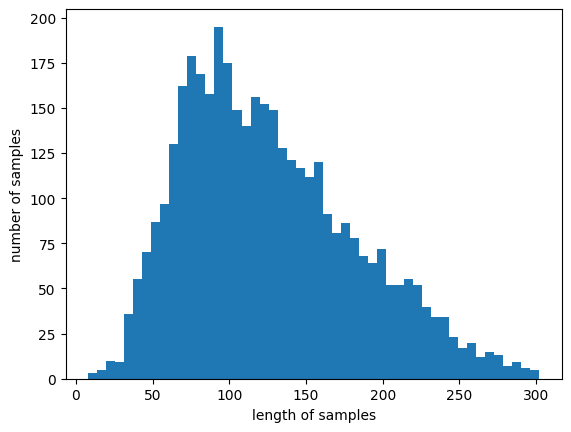

In [27]:
print('본문의 최대 길이 :',max(len(sent) for sent in X_train))
print('본문의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(sent) for sent in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
max_len = 302

In [29]:
X_train_encoded = pad_sequences(X_train_encoded, maxlen=max_len)
X_test_encoded = pad_sequences(X_test_encoded, maxlen=max_len)

In [30]:
X_train_encoded.shape

(3870, 302)

In [31]:
X_test_encoded.shape

(968, 302)

In [32]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
embedding_dim = 64
hidden_units = 64
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_encoded, y_train, epochs=15, batch_size=32, validation_split=0.2)
model.save("model1.h5")
# tf.saved_model.save(model)

Epoch 1/15


ValueError: in user code:

    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\chan\anaconda3\envs\ng\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 3) are incompatible


In [ ]:
#  callbacks=[es, mc], -> history - model.fit 안에 매개변수로 추가하기

In [ ]:
loaded_model = load_model('model1.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test_encoded, y_test)[1]))

### 우리가 사용할 데이터 돌려보기

In [ ]:
dataframes = []

for i in range(1, 35):
    filename = f"{i}.txt"
    file_path = os.path.join("news/", filename)
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            df = pd.DataFrame({'content': [content]})
            dataframes.append(df)
    except FileNotFoundError:
        print(f"File {filename} not found. Skipping...")

# 모든 데이터프레임을 하나로 합칩니다.
result_df = pd.concat(dataframes, ignore_index=True)

# 결과를 확인합니다.
print(result_df)

In [ ]:
(len(max(result_df['content'])))

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result_df['content'])
X_test_encoded = tokenizer.texts_to_sequences(result_df['content'])
print(X_test_encoded[:5])

In [ ]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size)

In [ ]:
print('본문의 최대 길이 :',max(len(sent) for sent in result_df['content']))
print('본문의 평균 길이 :',sum(map(len, result_df['content']))/len(result_df['content']))
plt.hist([len(sent) for sent in result_df['content']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 3878

In [ ]:
X_test_encoded = pad_sequences(X_test_encoded, maxlen=max_len)

In [ ]:
predicted_results = model.predict(X_test_encoded)

print(predicted_results)

In [ ]:
binary_matrix = np.zeros_like(predicted_results)
binary_matrix[np.arange(len(predicted_results)), predicted_results.argmax(axis=1)] = 1
print(binary_matrix)

In [ ]:
csv_file_path = "predict.csv"

# NumPy 배열을 CSV 파일로 저장
np.savetxt(csv_file_path, binary_matrix, delimiter=",", fmt='%d')